In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
geojson_df =pd.read_csv("geojson_lookup_rows.csv")
geojson_df.head()

,10_Digit_BBL,GeoBuilding,Latitude,Longitude
0,3017620041,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-73.955008,40.692556
1,1007017501,NaN,NaN,NaN
2,3021077502,NaN,NaN,NaN
3,1000130001,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-74.014611,40.704959
4,1000130005,"{""type"":""Feature"",""geometry"":{""type"":""MultiPol...",-74.014242,40.705379


In [4]:
energy_disclosure_df =pd.read_csv("energy_disclosure_2021_rows.csv")
energy_disclosure_df.head()


,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score
0,1007610020,325,WEST 37 STREET,48843,A,100
1,1007610022,313,WEST 37 STREET,82354,C,62
2,1007610028,307,WEST 37 STREET,102824,B,79
3,1007610033,545,8 AVENUE,166874,A,86
4,1007610037,555,8 AVENUE,162260,A,100


In [6]:
energy_disclosure_df.describe()

,10_Digit_BBL,Street_Number,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
count,1.000000e+02,100.000000,1.000000e+02,100.000000
mean,1.000952e+09,123.230000,5.103363e+05,63.250000
std,2.232645e+06,137.155508,5.303829e+05,27.262056
min,1.000050e+09,1.000000,2.548300e+04,1.000000
25%,1.000160e+09,25.000000,2.171008e+05,43.500000
50%,1.000220e+09,64.000000,3.611830e+05,75.500000
75%,1.000290e+09,202.750000,5.844400e+05,83.250000
max,1.007620e+09,555.000000,3.678000e+06,100.000000


In [31]:
geojson_df.isna().sum()
len(geojson_df)
geojson_df.iloc[10]

10_Digit_BBL    1008587502
GeoBuilding            NaN
Latitude               NaN
Longitude              NaN
Name: 10, dtype: object

In [37]:
energy_disclosure_df.isna().sum()

len(energy_disclosure_df)

100

In [40]:
merged_df = pd.merge(geojson_df,energy_disclosure_df,how='left', on='10_Digit_BBL')

In [39]:
merged_df[:1]

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score,GeoBuilding,Latitude,Longitude
0,1007610020,325,WEST 37 STREET,48843,A,100,NaN,NaN,NaN


In [41]:
merged_df.columns
len(merged_df)

100

C:\Users\skrgu\AppData\Local\Temp\ipykernel_22792\3639621574.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Energy_Efficiency_Grade",data = merged_df , palette ='Set2')


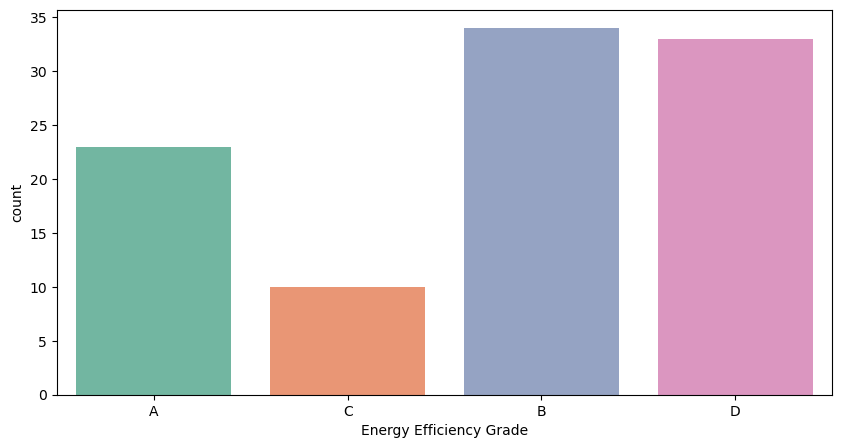

In [35]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(x="Energy_Efficiency_Grade",data = merged_df , palette ='Set2')
plt.xlabel("Energy Efficiency Grade")
plt.ylabel("count")
plt.show()

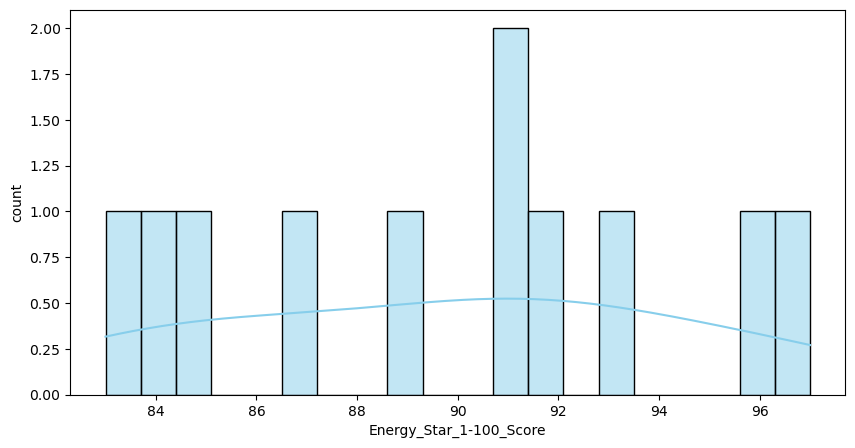

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(x=merged_df ["Energy_Star_1-100_Score"],bins=20, kde=True, color='skyblue')
plt.xlabel("Energy_Star_1-100_Score")
plt.ylabel("count")
plt.show()

In [105]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


y = energy_disclosure_df['Energy_Efficiency_Grade']


X =energy_disclosure_df.drop(columns=['Energy_Efficiency_Grade', 'Street_Name' ,'Energy_Efficiency_Grade','Street_Number','10_Digit_BBL'])
X.isna().sum()
y

0     A
1     C
2     B
3     A
4     A
     ..
95    C
96    B
97    C
98    B
99    D
Name: Energy_Efficiency_Grade, Length: 100, dtype: object

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test= train_test_split(X,y ,test_size=0.2 , random_state =42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

X_test.head()

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         6
           B       1.00      1.00      1.00         7
           D       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[6 0 0]
 [0 7 0]
 [0 0 7]]


,DOF_Gross_Square_Footage,Energy_Star_1-100_Score
83,1007569,80
53,447452,84
70,91553,3
45,287819,96
44,562340,77


In [107]:
def predict_energy_efficiency_grade(square_footage, energy_star_score):
    # Preprocess the input data
    new_data = pd.DataFrame({'DOF_Gross_Square_Footage': [square_footage],
                             'Energy_Star_1-100_Score': [energy_star_score]})
    
    # Make predictions
    prediction = model.predict(new_data)
    
    return prediction[0]



In [109]:
square_footage = 50000
energy_star_score = 80
predicted_grade = predict_energy_efficiency_grade(square_footage, energy_star_score)
print("Predicted Energy Efficiency Grade:", predicted_grade)

Predicted Energy Efficiency Grade: B


# 